# Test of class Hamiltonian_QED



This notebook uses the class in 'Hamiltonian_QED_oprt.py' and 'Hamiltonian_QED_sym.py' that builds the Hamiltonian in terms of Pauli matrices.


In [49]:
import qiskit

In [50]:
from scipy.sparse.linalg import eigsh
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../") # go to parent dir
from itertools import permutations
from scipy.sparse.linalg import eigsh

In [51]:
from Hamiltonian_QED_sym import HamiltonianQED_sym
from Hamiltonian_QED_oprt import HamiltonianQED_oprt
from HC_Lattice import HCLattice

##### Class Hamilt

In [52]:
#class input parameters:
n_sites = [3,2]#how many sites for every dimension

#Hamiltonian parameters:
g=0.5
fact_e_op = 1
fact_b_op = 1
m=3
omega=1
l=1
L=8
rotors = False
lambd = 1000
encoding = 'gray' #'ed'#
magnetic_basis=False
pbc=False
puregauge = False
static_charges_values =None#{(0,0):1,(1,0):-1}#TODO: no conditions applied, like charge conservation, etc. For conditions see func_qstatic_dist
display_hamiltonian=False
e_op_out_plus=False #if E out of site n has plus sign
sparse_pauli=True
#exact diagonalisation parameters:
threshold = 1e-12
num_eigs = 2

In [53]:
latt = HCLattice(n_sites,pbc=pbc)


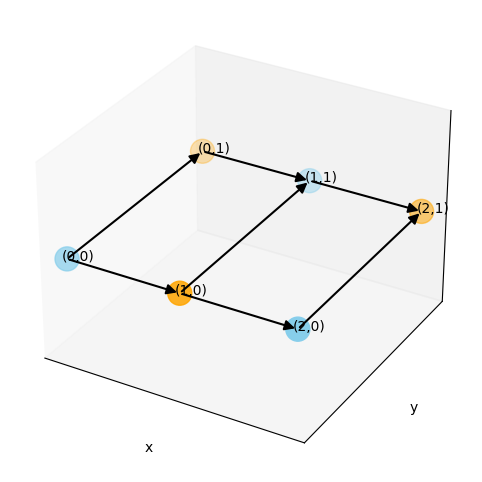

In [54]:

latt.draw_graph_func(gauss_law_fig=False,static_charges=static_charges_values)


In [55]:
#latt.func_qstatic_dist()#ch_val=1)
#[latt.draw_graph_func(gauss_law_fig=False,static_charges=st ) for st in latt.distances_coord]#,savefig_dir='.')

In [56]:
#Input parameters for the Hamiltonian
from sympy import Symbol

e_op_free_input_f=[ 'q_01', 'q_11', 'q_21', 'q_20', 'q_10']
e_op_free_input_g=['E_20y', 'E_10y']
e_op_free_input=[Symbol(e) for e in e_op_free_input_f[::-1]+e_op_free_input_g[::-1]]

In [57]:
# Creating a configuration dictionary with common inputs
config = {
    'latt': latt,
    'n_sites': n_sites,
    'l':l,
    'L':L,
    'encoding':encoding,
    'magnetic_basis': magnetic_basis,
    'pbc': pbc,
    'puregauge': puregauge,
    'static_charges_values': None,
    'e_op_out_plus': e_op_out_plus,
    'e_op_free_input':e_op_free_input
}
hamilt_sym = HamiltonianQED_sym(config,display_hamiltonian=True)
class_H_oprt = HamiltonianQED_oprt( config,hamilt_sym, sparse_pauli=sparse_pauli)

Alpha angle α=2 π/2L+1
HamiltonianQED_sym: Initializing...
>> Gauss law system of equations (symbolic + latex):
static charges: None


Eq(-E_00x - E_00y - q_00, 0)

Eq(E_00y - E_01x - q_01, 0)

Eq(E_00x - E_10x - E_10y - q_10, 0)

Eq(E_01x + E_10y - E_11x - q_11, 0)

Eq(E_10x - E_20y - q_20, 0)

Eq(E_11x + E_20y - q_21, 0)

Eq(q_00 + q_01 + q_10 + q_11 + q_20 + q_21, 0)

- E_{00x} - E_{00y} - q_{00} &= 0 \\ \nonumber
E_{00y} - E_{01x} - q_{01} &= 0 \\ \nonumber
E_{00x} - E_{10x} - E_{10y} - q_{10} &= 0 \\ \nonumber
E_{01x} + E_{10y} - E_{11x} - q_{11} &= 0 \\ \nonumber
E_{10x} - E_{20y} - q_{20} &= 0 \\ \nonumber
E_{11x} + E_{20y} - q_{21} &= 0 \\ \nonumber
q_{00} + q_{01} + q_{10} + q_{11} + q_{20} + q_{21} &= 0 

> Gauss law equations solved
> e_op_free and u_op_free built
>> Hamiltonian (symbolic + latex):


Eq(H_E, g**2*(E_10y**2 + E_20y**2 + (-E_20y + q_21)**2 + (E_20y + q_20)**2 + (-E_10y - E_20y + q_11 + q_21)**2 + (E_10y + E_20y + q_10 + q_20)**2 + (-E_10y - E_20y + q_01 + q_11 + q_21)**2)/2)

H_{E} = \frac{g^{2} \left(E_{10y}^{2} + E_{20y}^{2} + \left(- E_{20y} + q_{21}\right)^{2} + \left(E_{20y} + q_{20}\right)^{2} + \left(- E_{10y} - E_{20y} + q_{11} + q_{21}\right)^{2} + \left(E_{10y} + E_{20y} + q_{10} + q_{20}\right)^{2} + \left(- E_{10y} - E_{20y} + q_{01} + q_{11} + q_{21}\right)^{2}\right)}{2}


Eq(H_B, -(U_10y + U_20y*Dagger(U_10y) + h.c.)/(2*g**2))

H_{B} = - \frac{U_{10y} + U_{20y} U_{10y}^{\dagger} + h.c.}{2 g^{2}}


Eq(H_K, Omega*(-0.5*(h.c.(y) + Dagger(Phi_1)*Phi_6 - Dagger(Phi_2)*Dagger(U_10y)*Phi_5 + Dagger(Phi_3)*Dagger(U_20y)*Phi_4) + 0.5*I*(-h.c.(x) + Dagger(Phi_1)*Phi_2 + Dagger(Phi_2)*Phi_3 + Dagger(Phi_5)*Phi_4 + Dagger(Phi_6)*Phi_5)))

H_{K} = \Omega \left(- 0.5 \left(h.c.(y) + \Phi_{1}^{\dagger} \Phi_{6} - \Phi_{2}^{\dagger} U_{10y}^{\dagger} \Phi_{5} + \Phi_{3}^{\dagger} U_{20y}^{\dagger} \Phi_{4}\right) + 0.5 i \left(- h.c.(x) + \Phi_{1}^{\dagger} \Phi_{2} + \Phi_{2}^{\dagger} \Phi_{3} + \Phi_{5}^{\dagger} \Phi_{4} + \Phi_{6}^{\dagger} \Phi_{5}\right)\right)


Eq(H_m, m*(Dagger(Phi_1)*Phi_1 - Dagger(Phi_2)*Phi_2 + Dagger(Phi_3)*Phi_3 - Dagger(Phi_4)*Phi_4 + Dagger(Phi_5)*Phi_5 - Dagger(Phi_6)*Phi_6))

H_{m} = m \left(\Phi_{1}^{\dagger} \Phi_{1} - \Phi_{2}^{\dagger} \Phi_{2} + \Phi_{3}^{\dagger} \Phi_{3} - \Phi_{4}^{\dagger} \Phi_{4} + \Phi_{5}^{\dagger} \Phi_{5} - \Phi_{6}^{\dagger} \Phi_{6}\right)
>> Gauss law applied and Hamiltonian built.  Execution time: 0.10610008239746094 seconds
HamiltonianQED_oprt: Initializing...
> e_op_free and u_op_free built
> Pauli strings built
qubit order |qn...q2q1q0>: [q_01, q_11, q_21, q_20, q_10, q_00, U_20y, U_10y]
Hamiltonian_el_pauli done
>> Hamiltonian built.  Execution time: 4.6718010902404785 seconds
Hamiltonian suppr fermions...
Hamiltonian suppr fermions done
>> Suppression term built.  Execution time: 0.011372804641723633 seconds


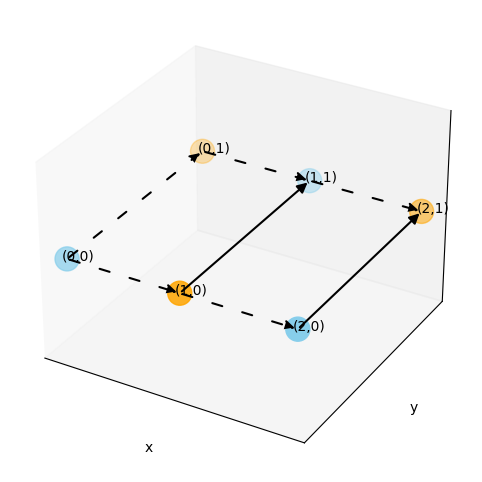

In [58]:
#only dynamical fields after Gauss law applied
latt.draw_graph_func(gauss_law_fig=True,e_op_free=class_H_oprt.e_op_free)#,savefig_dir='.')

##### ED spectrum

In [59]:
import scipy.sparse as sp

In [60]:
Hamiltonian_Pauli_tot = class_H_oprt.get_hamiltonian(g_var=g, m_var=m, omega=omega,fact_b_op=fact_b_op,fact_e_op=fact_b_op,lambd=lambd)
#memory sparse matrix
if encoding=='gray':
    Hamiltonian_Pauli_tot = Hamiltonian_Pauli_tot#.to_matrix(sparse=True)
    h_b_sparse = class_H_oprt.hamiltonian_mag_pauli#.to_matrix(sparse=True) #plaquette
elif encoding=='ed':
    Hamiltonian_Pauli_tot = sp.csr_matrix(Hamiltonian_Pauli_tot)
    h_b_sparse =sp.csr_matrix(class_H_oprt.hamiltonian_mag_pauli)
spectrum, eigenvectors_matrix =eigsh(Hamiltonian_Pauli_tot,k=num_eigs,which="SA")
#spectrum
idx = spectrum.argsort()
spectrum = spectrum[idx]
eigenvectors_matrix = eigenvectors_matrix[:,idx]
print(f'Spectrum of {latt.dims}D_'+'x'.join([str(i) for i in n_sites])+f'  H with mbasis{magnetic_basis} puregauge{puregauge} pbc{pbc} g{g} l{l} L{L} factE{fact_e_op} factB{fact_b_op} m{m} Omega{omega}, encoding:'+encoding)
for kk,evalu in enumerate(spectrum):
        if evalu<900:# only physical states, 1000 corresponds to factor of penalty term
                print(f'E_{kk}=',round(evalu,8))

if class_H_oprt.len_e_op != 0:
    eig0cj = sp.csr_matrix(eigenvectors_matrix[:,0]).transpose().conjugate()
    eig0= sp.csr_matrix(eigenvectors_matrix[:,0])
    plaq = (eig0*h_b_sparse*eig0cj/len(latt.plaq_list) ).toarray()[0][0].real
    print(f'plaq={plaq}')



Spectrum of 2D_3x2  H with mbasisFalse puregaugeFalse pbcFalse g0.5 l1 L8 factE1 factB1 m3 Omega1, encoding:gray
E_0= -13.88614967
E_1= -11.90255248
plaq=0.626502925860335
